In [1]:
#gerekli kütüphaneler

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#sürüm içi hataları görmezden gel

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 

In [3]:
#veri okuma

df=pd.read_csv("winequality.csv")
df.head(4)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6


## VERİ GÖRSELLEŞTİRME VE YORUMLAMA

In [4]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [5]:
#şarap kalitesi verilerini 5.63 ortalama değeri baz alınarak 0 ve 1 e atama
#Daha dengeli bir dağılım yakalamak için bu işlemi yapıyoruz.
df['quality_level'] = [1 if x >= 5.63 else 0 for x in df['quality']]
df.drop('quality',axis=1, inplace=True)

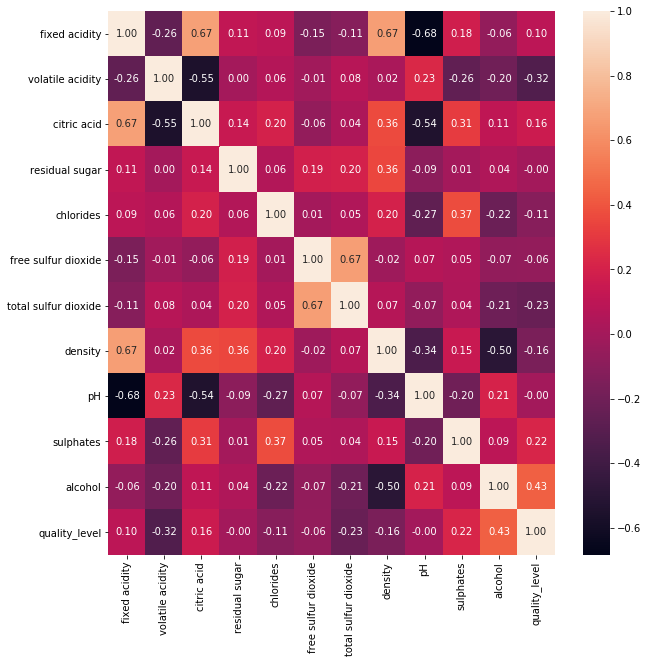

In [6]:
#korelasyon tablosu 

#corr
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='.2f')
plt.show()

### Korelasyon matrisi yorumlanması; 
##### Fixed Acidity - Density ---> 0.67 orta düzey ilişki
##### Density - Alcohol ----> -0.50 orta düzey ters ilişki
##### Fixed Acidity - pH ----> -0.68 orta düzey ters ilişki
##### Quality - Alcohol ----> 0.43 orta düzey ilişki
##### Alcohol - pH ----> 0.21 düşük düzey ilişki
##### Citric Acid - pH ----> -0.54 ters orta düzey ilişki
##### pH - Volatile Acidiy ----> 0.23 düşük düzey ilişki değişkenler arası ilişki seviyelerinden bazılarıdır.
##### Herhangi iki dğeişken arasında yüksek düzeyde ilişki mevcut değildir. Genel olarak rastlanan değerler düşük düzeydedir.

Text(0, 0.5, 'density')

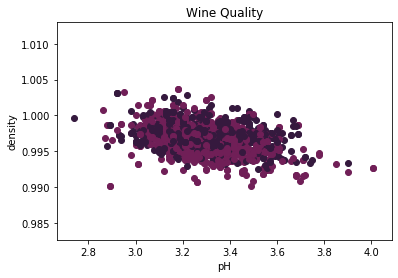

In [7]:
#şarap kalitesine göre pH ve density değerleri üzerinden scatter plot çizdirme

# create color dictionary
colors2=sns.color_palette("rocket")

# create a figure and axis
fig, ax = plt.subplots()
# plot each data-point
for i in range(len(df['quality_level'])):
    ax.scatter(df['pH'][i], df['density'][i],color=colors2[df['quality_level'][i]])
   
ax.set_title('Wine Quality')
ax.set_xlabel('pH')
ax.set_ylabel('density')

C:\Users\Havva\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


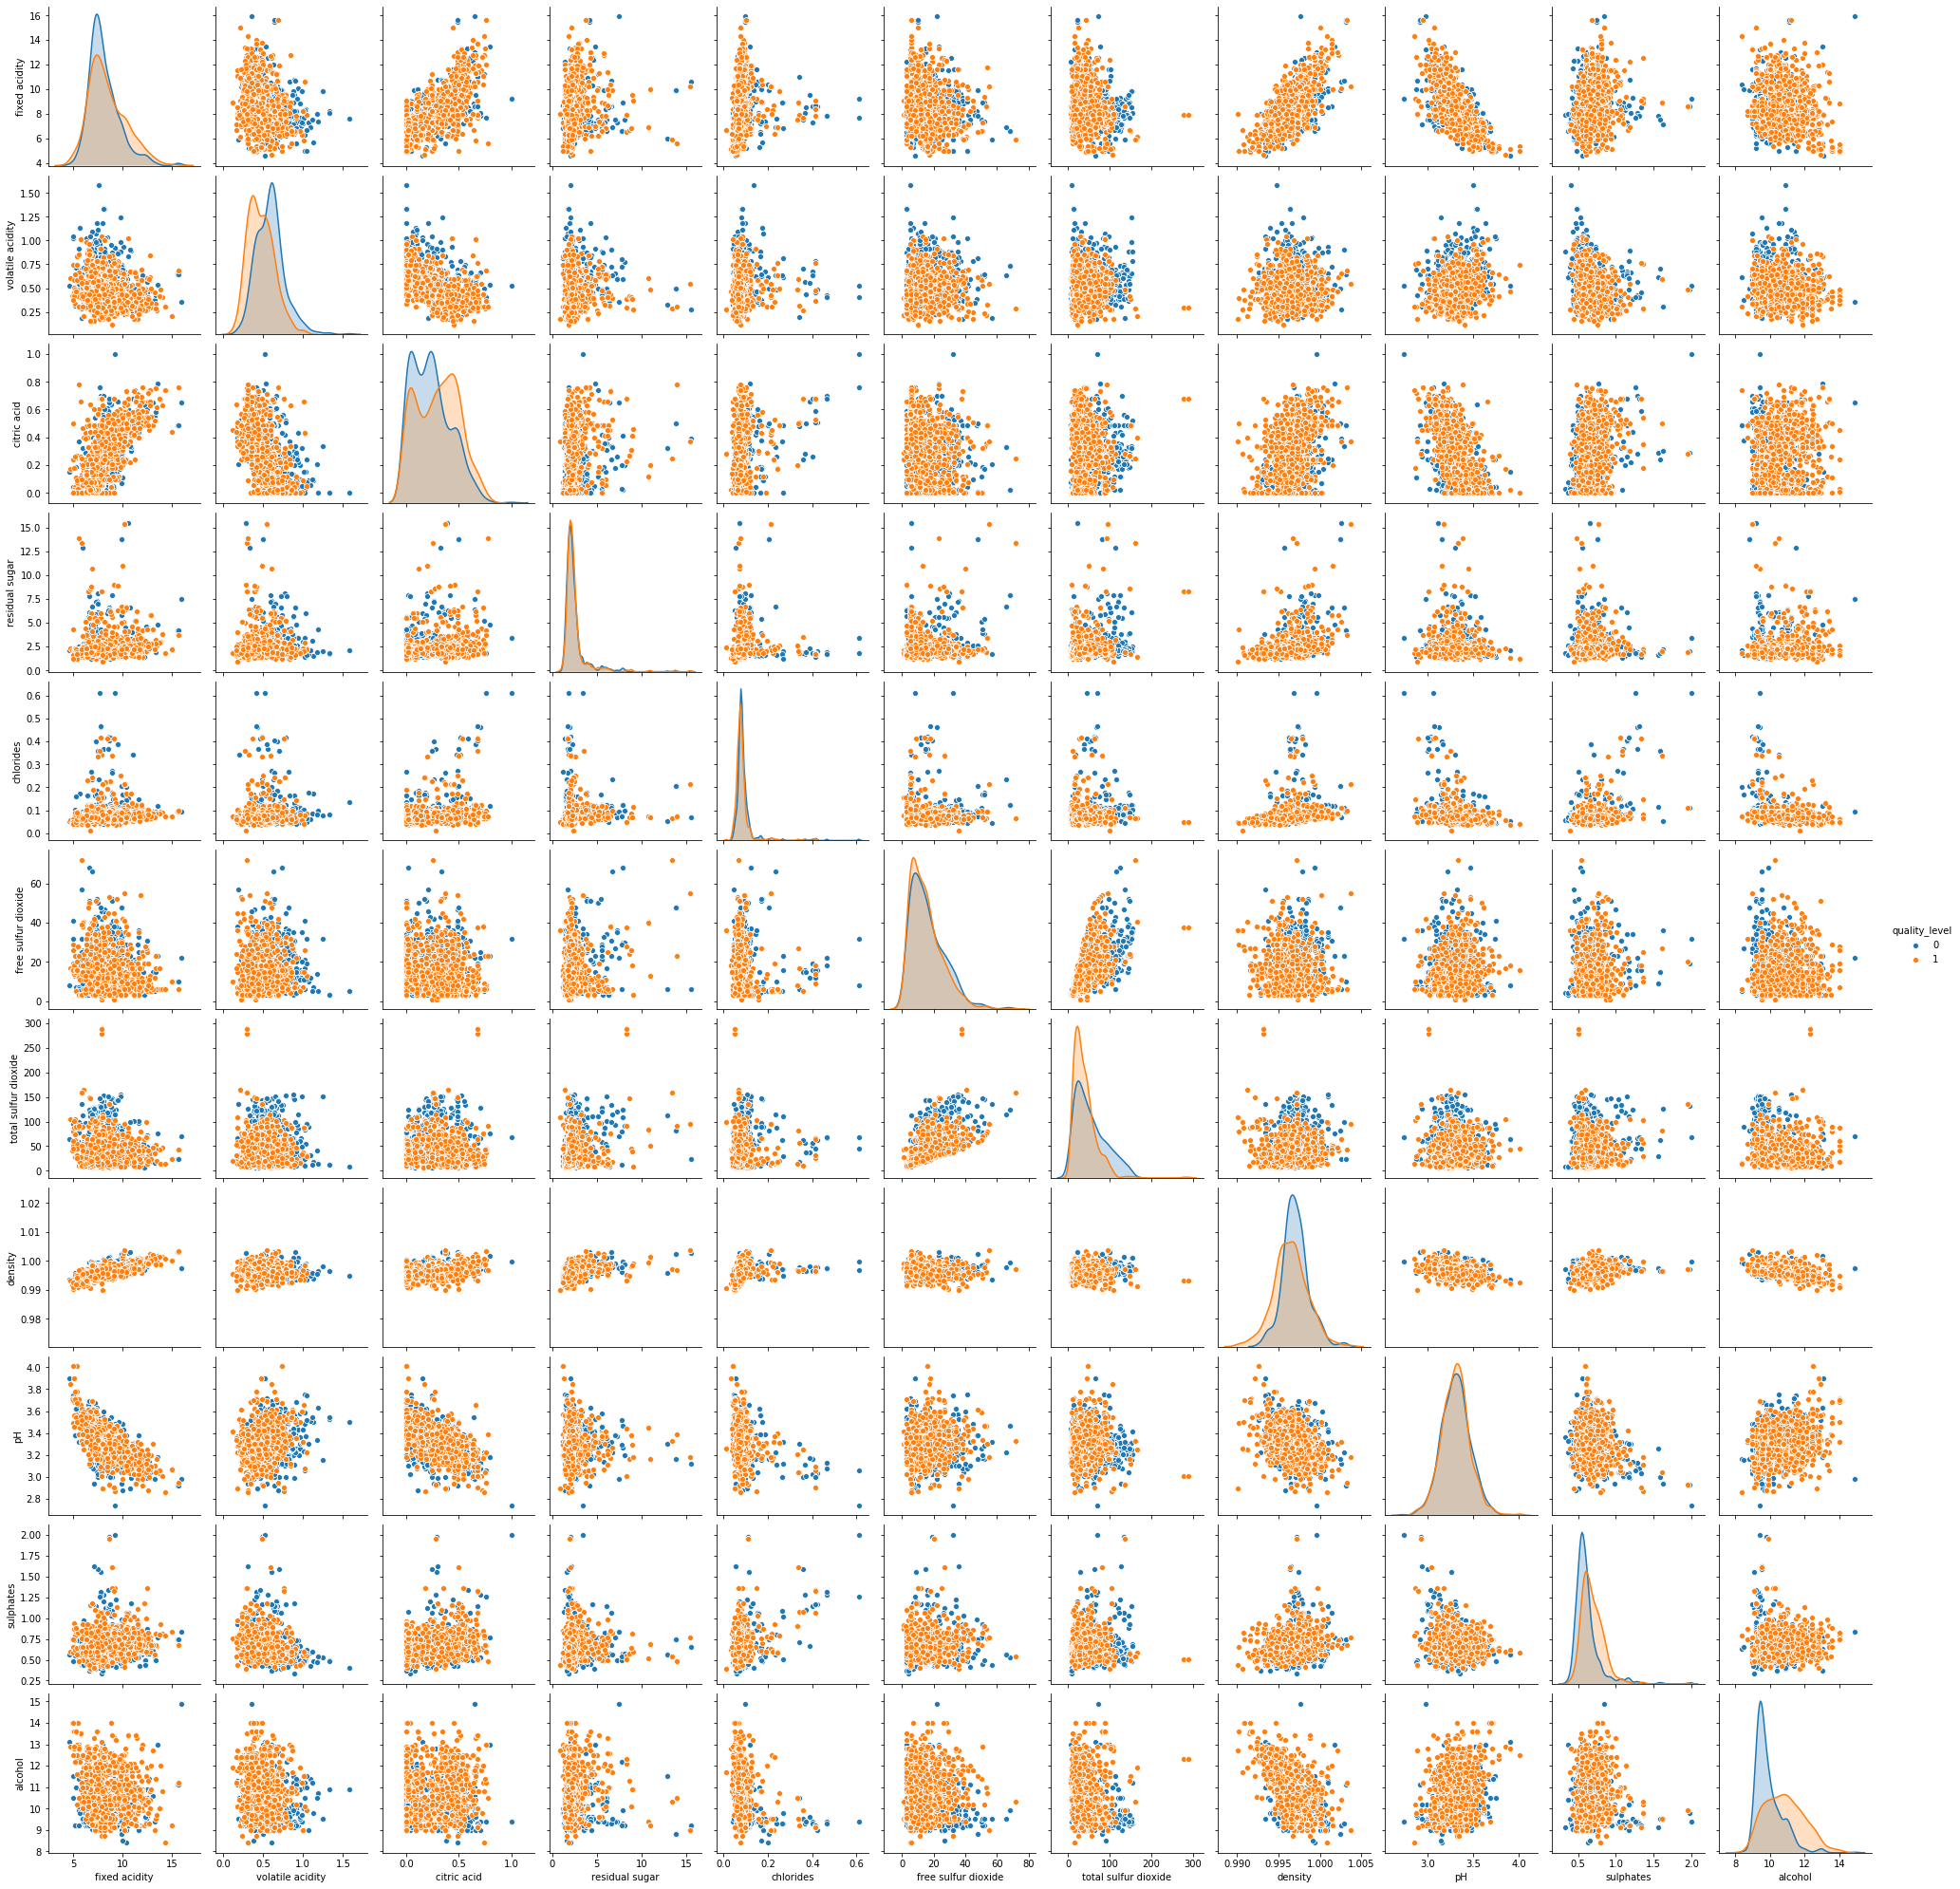

In [8]:
#degisken datalarının kalite seviyelerinin diger degisken dataları üzerine dagılımı
sns.pairplot(df, hue='quality_level', size=2.5)

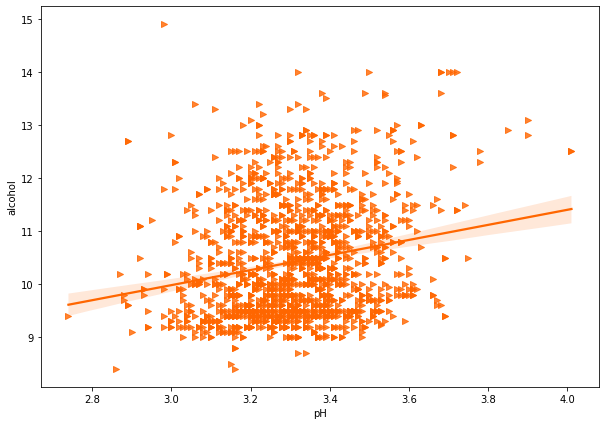

In [9]:
#şarapların içerdiği alkol oranlarına karşılık ölçülmüş pH değerleri
plt.figure(figsize=(10,7))
sns.regplot(x=df.pH , y=df.alcohol , color='#FF6600' , marker='>')
plt.show()